In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("house prediction/train.csv")

# Printing first 5 records of the dataset
print(dataset.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [90]:
dataset.shape

(1460, 81)

In [91]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 43
Integer variables: 35
Float variables: 3


<ipython-input-92-9e8f894519cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

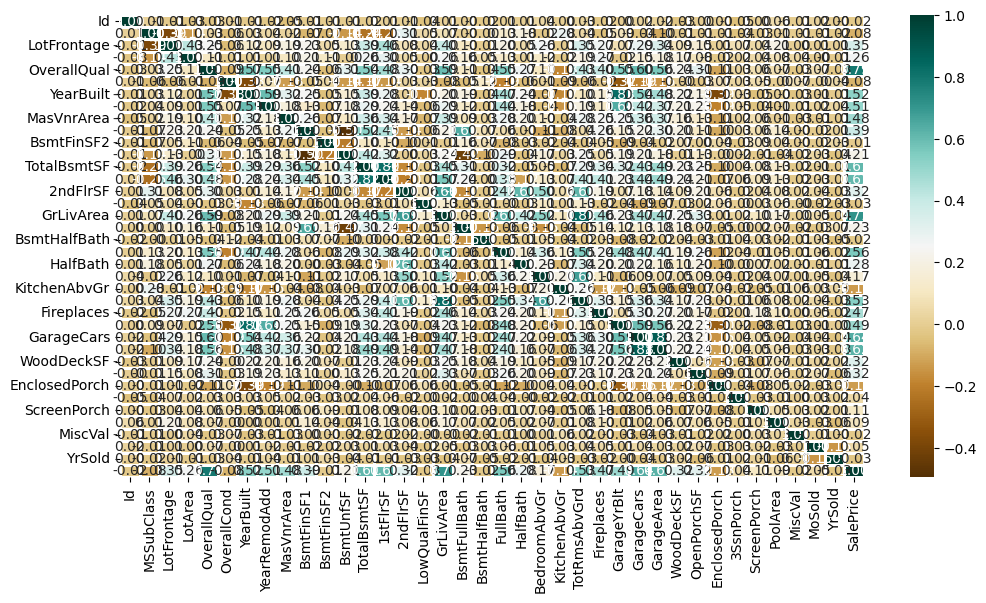

In [92]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

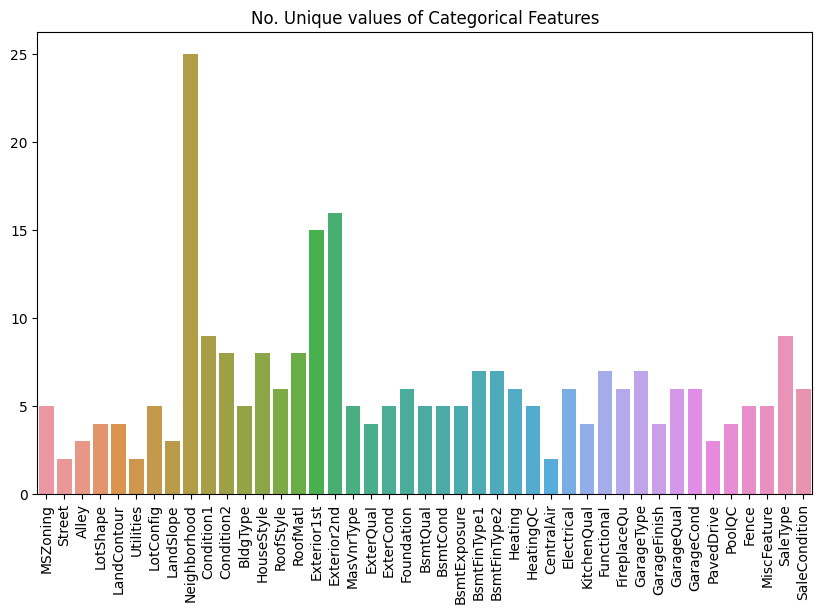

In [93]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

<ipython-input-94-8370a862c48c>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


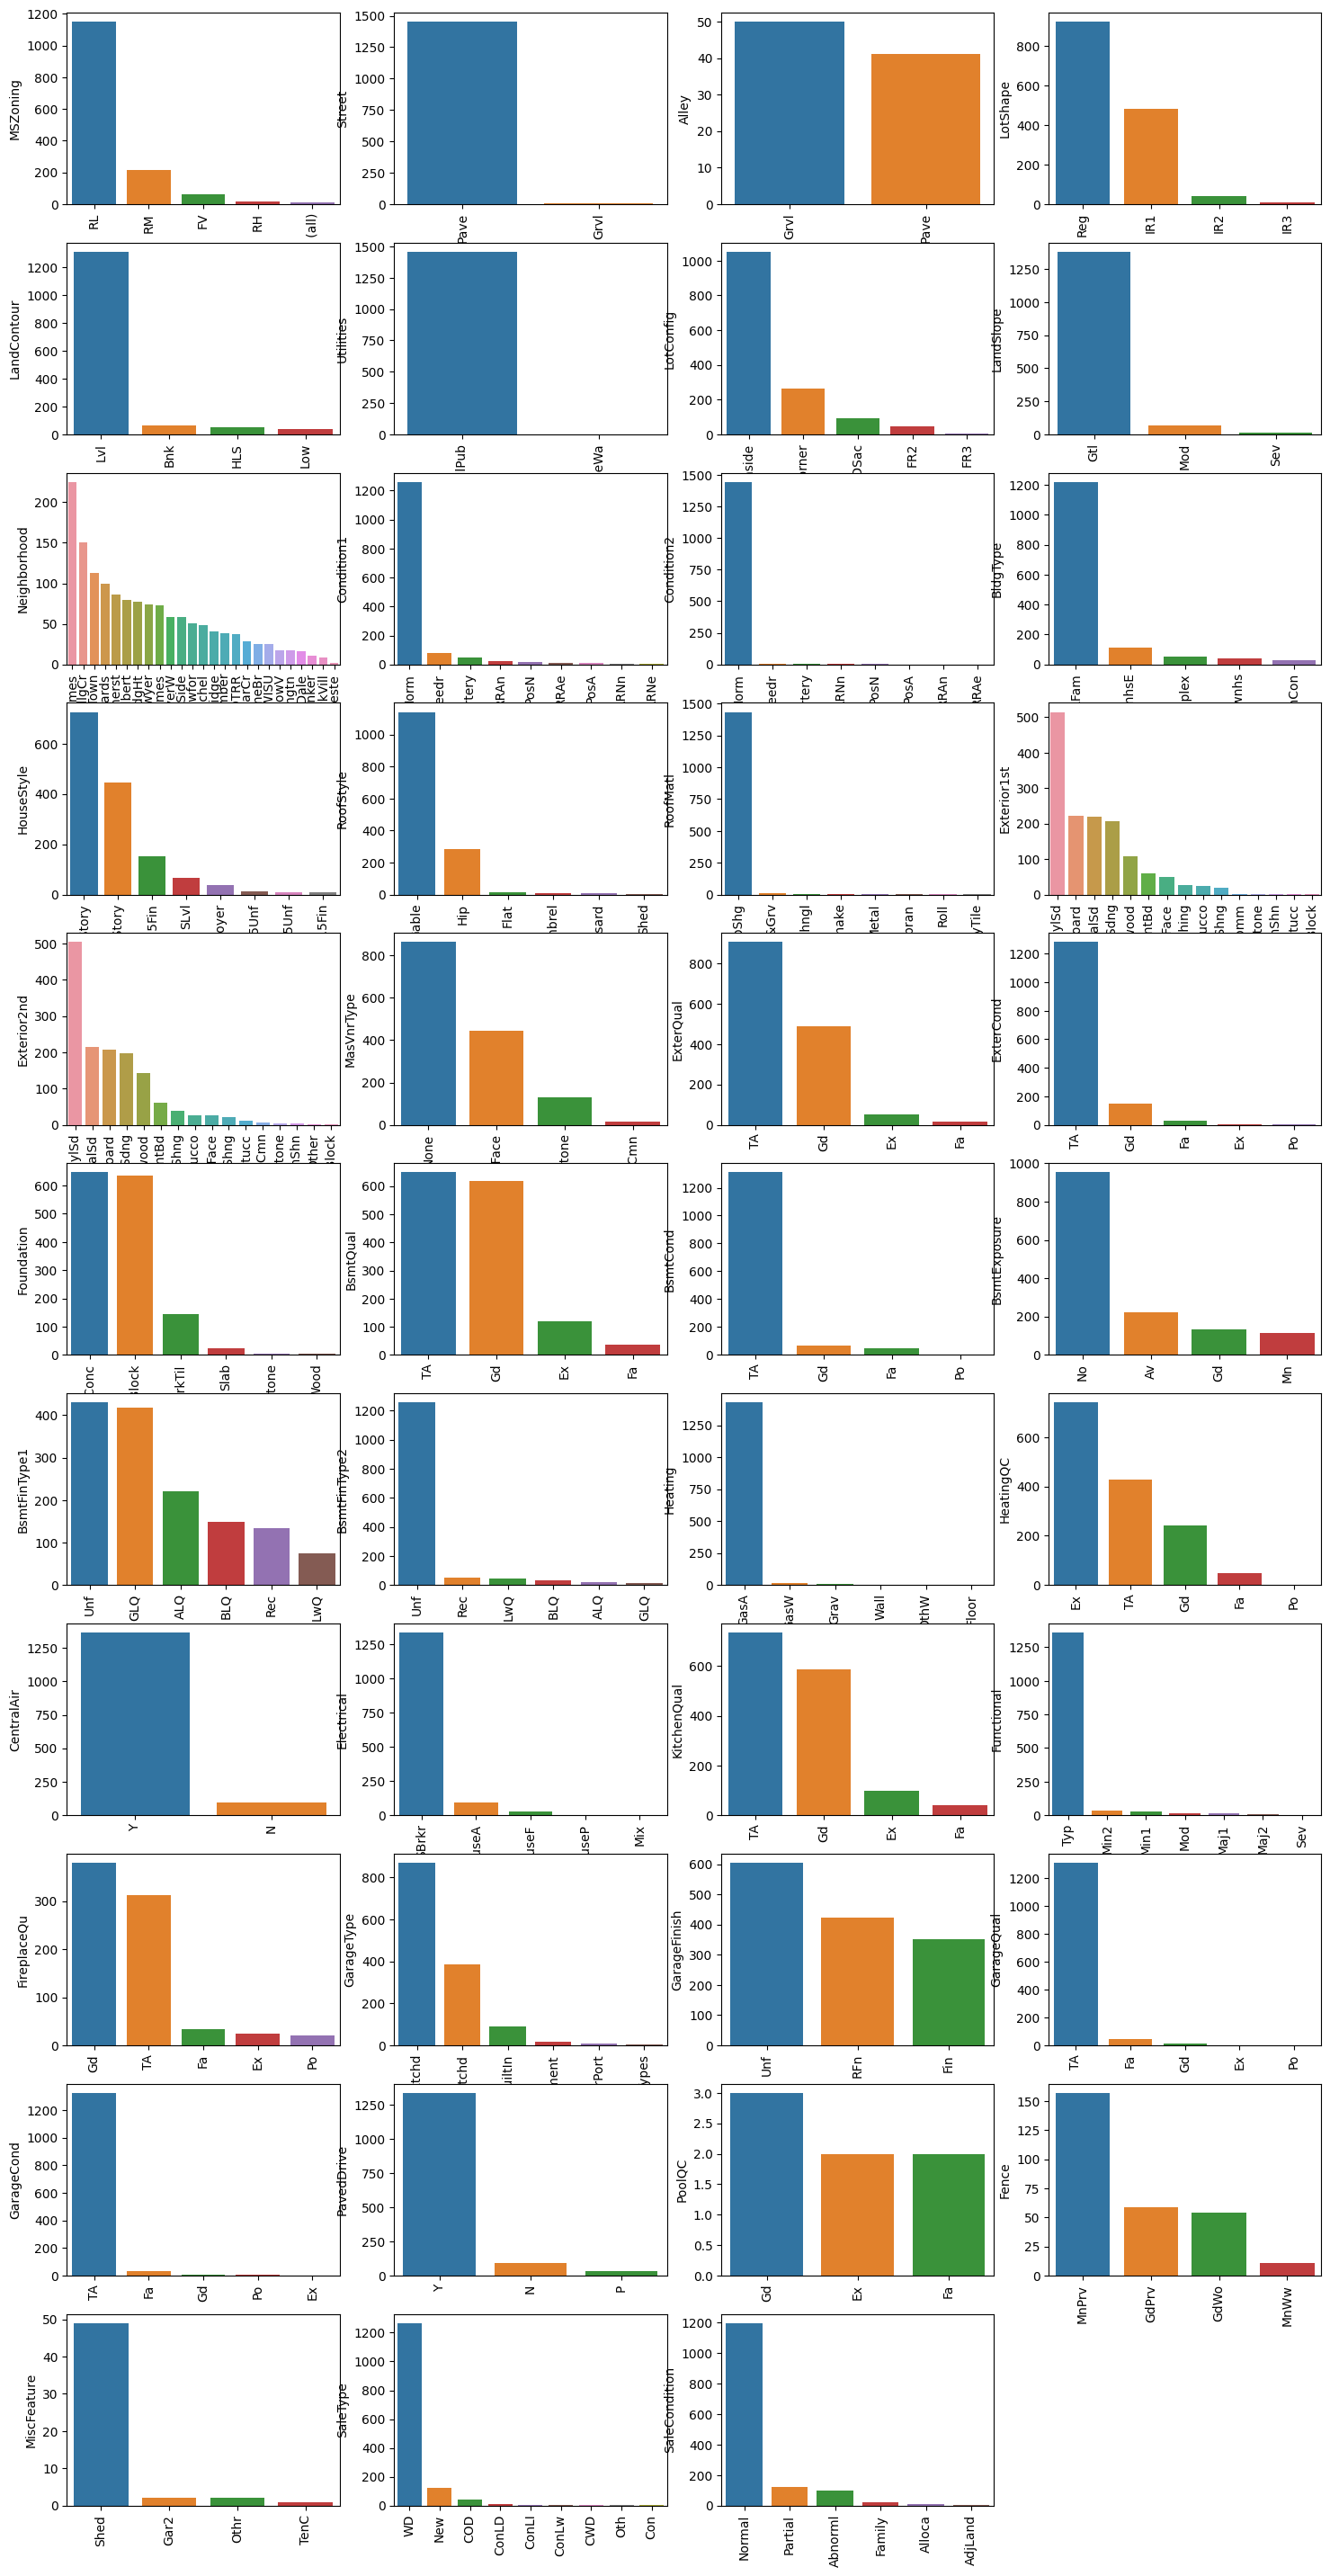

In [94]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [95]:
dataset.drop(['PoolQC'], axis=1, inplace=True)


In [96]:
dataset.drop(['Alley'], axis=1, inplace=True)

In [97]:
dataset.drop(['Fence'], axis=1, inplace=True)

In [98]:
dataset.drop(['MiscFeature'], axis=1, inplace=True)

In [99]:
dataset.shape

(1460, 77)

In [100]:
# Replace missing values in a categorical column with the mode
dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0], inplace=True)


In [101]:
# Forward fill missing values in a categorical column
dataset['FireplaceQu'].fillna(method='ffill', inplace=True)


In [102]:
# Replace missing values in a numerical column with the mean
dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean(), inplace=True)


In [103]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [104]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

In [105]:
new_dataset = dataset.dropna()

In [106]:
new_dataset.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [107]:
new_dataset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,...,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,56.133134,70.634398,10707.982049,6.219147,5.596859,1973.006731,1985.655946,110.296185,464.053852,49.255049,...,99.459237,47.772625,21.279731,3.588631,16.446522,3.012715,42.964847,6.335079,2007.805535,186745.523560
std,41.267877,22.169335,10340.304506,1.324795,1.078404,29.563224,20.298516,185.659471,458.916392,166.253315,...,127.555788,65.386019,60.863948,30.235772,58.071570,41.976957,508.245001,2.697843,1.331178,78941.133815
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7742.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,70.049958,9600.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,412.000000,0.000000,...,12.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,80.000000,11764.000000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,...,175.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [108]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
No. of. categorical features:  39


In [109]:
print(new_dataset.shape)
print(OH_cols_df.shape)

(1337, 76)
(1337, 234)


In [110]:
new_dataset.reset_index(drop=True, inplace=True)
OH_cols_df.reset_index(drop=True, inplace=True)


In [111]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instantiate the OneHotEncoder with sparse_output set to its default value (True)
OH_encoder = OneHotEncoder(sparse_output=True)

# Fit and transform the categorical columns
OH_cols = OH_encoder.fit_transform(new_dataset[object_cols])

# Create feature names for the one-hot encoded columns
feature_names = []
for i, col in enumerate(object_cols):
    unique_values = new_dataset[col].unique()
    for val in unique_values:
        feature_names.append(f"{col}_{val}")

# Create a DataFrame from the one-hot encoded array with custom column names
OH_cols_df = pd.DataFrame(OH_cols.toarray(), columns=feature_names)  # Convert to dense array

# Reset indices to make them compatible
new_dataset.reset_index(drop=True, inplace=True)
OH_cols_df.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df_final = pd.concat([new_dataset.drop(object_cols, axis=1), OH_cols_df], axis=1)


In [112]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [113]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.2769035250486319


In [114]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.09788075845725276

In [115]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.0942926914651831
